In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Set plotting style
sns.set(style='whitegrid')

In [9]:
# Load the dataset with proper encoding to handle the issue
file_path = r"C:/Users/HHGiang/Documents/KEIO/4FZ/STEP Vietnam_HH Roster_s10_final.csv"
data = pd.read_csv(file_path, encoding='latin1')

C:\Users\HHGiang\AppData\Local\Temp\ipykernel_388\4230720119.py:3: DtypeWarning: Columns (52,64,67) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1')


In [10]:
data.head()

,country_adit,cluster,hhn,idcode,id_selected,check_digit,final_status,FinStat1,FinRespCat_HH,W1_HHwt,...,m1b_q21_2,m1b_q21_3,m1b_q21_4,m1b_q21_5,m1b_q21_6,m1b_q21_7,m1b_q21_8,m1b_q21_9,m1b_q21_10,country
0,VNM,101,1,2,4,1,88,88,1,11.424558,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,Vietnam
1,VNM,101,1,4,4,1,88,88,1,11.424558,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,Vietnam
2,VNM,101,1,1,4,1,88,88,1,11.424558,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,Vietnam
3,VNM,101,1,3,4,1,88,88,1,11.424558,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,Vietnam
4,VNM,101,2,3,1,8,88,88,1,11.424558,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,Vietnam


In [21]:
# Selecting key variables for analysis
columns_to_keep = {
    'm1a_q02': 'Sex',
    'm1a_q03': 'Relationship_to_HH_Head',
    'm1a_q04': 'Age',
    'm1a_q09': 'Education_Level',
    'm1a_q14': 'Worked_in_Last_7_Days',
    'm1a_q15': 'Looked_for_Work',
    'm1a_q16': 'Present_Employment',
    'm1a_q17': 'Employment_Type'
}
# Filter out the relevant columns
filtered_data = data[list(columns_to_keep.keys())].rename(columns=columns_to_keep)

# Fill missing values with 0 in employment-related fields
filtered_data['Worked_in_Last_7_Days'].fillna(0, inplace=True)
filtered_data['Looked_for_Work'].fillna(0, inplace=True)
filtered_data['Present_Employment'].fillna(0, inplace=True)
filtered_data['Employment_Type'].fillna(0, inplace=True)

# Convert categorical columns to category dtype
categorical_columns = ['Sex', 'Education_Level', 'Worked_in_Last_7_Days', 'Looked_for_Work', 'Present_Employment', 'Employment_Type']
filtered_data[categorical_columns] = filtered_data[categorical_columns].apply(lambda col: col.astype('category'))

# Checking cleaned data
print("\nCleaned data summary:")
print(filtered_data.info())


Cleaned data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14816 entries, 0 to 14815
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Sex                      14816 non-null  category
 1   Relationship_to_HH_Head  14816 non-null  int64   
 2   Age                      14816 non-null  int64   
 3   Education_Level          13310 non-null  category
 4   Worked_in_Last_7_Days    14816 non-null  category
 5   Looked_for_Work          14816 non-null  category
 6   Present_Employment       14816 non-null  category
 7   Employment_Type          14816 non-null  category
dtypes: category(6), int64(2)
memory usage: 319.7 KB
None


In [22]:
filtered_data.head()

,Sex,Relationship_to_HH_Head,Age,Education_Level,Worked_in_Last_7_Days,Looked_for_Work,Present_Employment,Employment_Type
0,2,2,43,3.0,1.0,0.0,0.0,2.0
1,2,3,18,4.0,2.0,2.0,2.0,0.0
2,1,1,50,3.0,1.0,0.0,0.0,1.0
3,2,3,23,6.0,1.0,0.0,0.0,1.0
4,2,3,27,6.0,1.0,0.0,0.0,1.0


In [14]:
filtered_data.head()

,Sex,Relationship_to_HH_Head,Age,Education_Level,Worked_in_Last_7_Days,Looked_for_Work,Present_Employment,Employment_Type


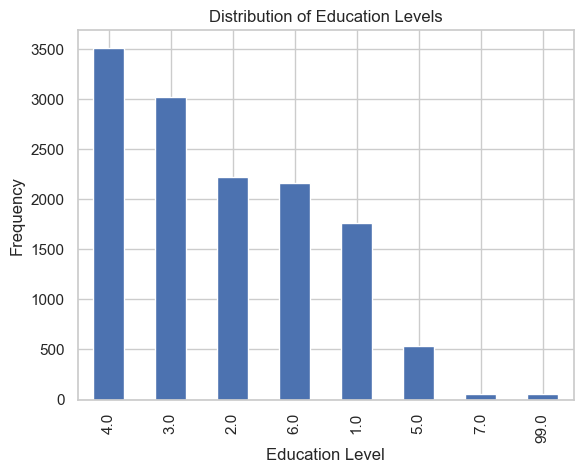

In [23]:
# 1. Distribution of Education Levels
filtered_data['Education_Level'].value_counts().plot(kind='bar', title='Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

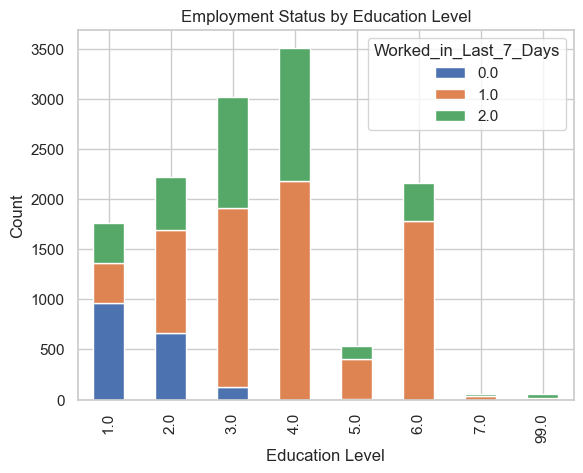

In [24]:
# 2. Employment Status by Education Level
employment_by_education = pd.crosstab(filtered_data['Education_Level'], filtered_data['Worked_in_Last_7_Days'])
employment_by_education.plot(kind='bar', stacked=True, title='Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

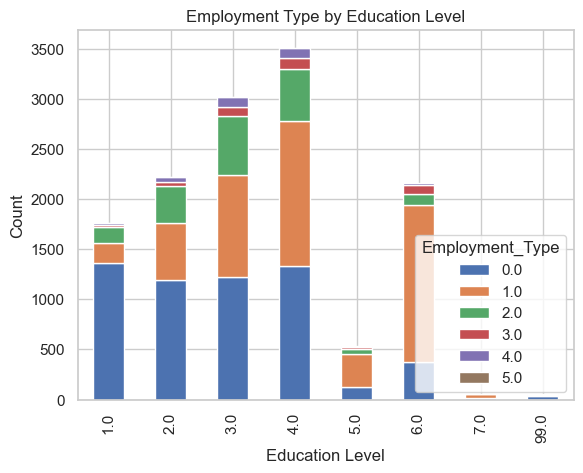

In [25]:
# 3. Employment Type by Education Level
employment_type_by_education = pd.crosstab(filtered_data['Education_Level'], filtered_data['Employment_Type'])
employment_type_by_education.plot(kind='bar', stacked=True, title='Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

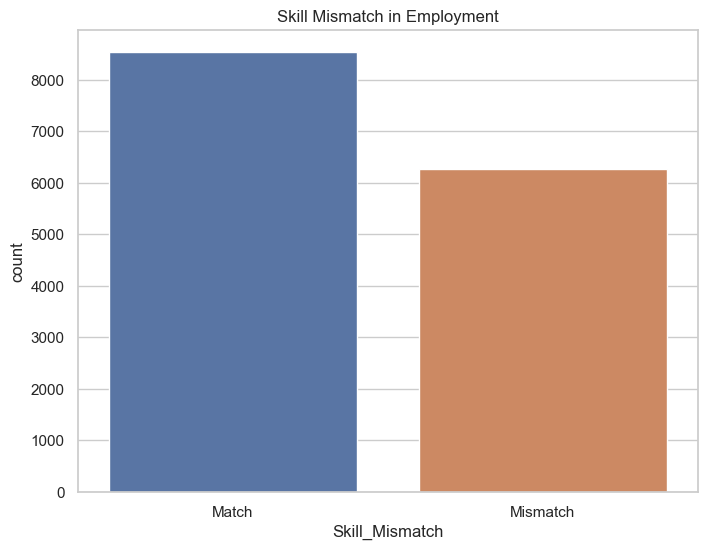

In [28]:
# Define mismatch: Education level vs Employment Type
# We assume that education levels 4, 5, and 6 correspond to skilled jobs, while 1, 2, and 3 correspond to unskilled.

def skill_mismatch(row):
    if row['Education_Level'] >= 4 and row['Employment_Type'] <= 2:
        return 'Mismatch'
    elif row['Education_Level'] <= 3 and row['Employment_Type'] > 2:
        return 'Mismatch'
    else:
        return 'Match'

# Apply the mismatch calculation
filtered_data['Skill_Mismatch'] = filtered_data.apply(skill_mismatch, axis=1)

# Plot the skill mismatch
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x='Skill_Mismatch')
plt.title('Skill Mismatch in Employment')
plt.show()

In [30]:
filtered_data.head()

,Sex,Relationship_to_HH_Head,Age,Education_Level,Worked_in_Last_7_Days,Looked_for_Work,Present_Employment,Employment_Type,Skill_Mismatch
0,2,2,43,3.0,1,0.0,0.0,2.0,Match
1,2,3,18,4.0,2,2.0,2.0,0.0,Mismatch
2,1,1,50,3.0,1,0.0,0.0,1.0,Match
3,2,3,23,6.0,1,0.0,0.0,1.0,Mismatch
4,2,3,27,6.0,1,0.0,0.0,1.0,Mismatch


In [41]:
import pandas as pd

# Load the datasets (update file paths as needed)
data_1 = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\c6771ebb-bd69-438f-9589-1740ff4d3a5f_Data.csv")
data_2 = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\4404cbb8-32ae-4821-9f78-43f265c2ded1_Data.csv")

# Display initial structure of the datasets
print(data_1.head())
print(data_2.head())

# Rename the year columns to remove "[YR]" and convert to integers
def clean_year_columns(df):
    df.columns = df.columns.str.replace(r'\[YR\d{4}\]', '', regex=True).str.strip()
    return df

data_1 = clean_year_columns(data_1)
data_2 = clean_year_columns(data_2)

# Now reshape the data from wide format (years as columns) to long format
def reshape_data(df):
    id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
    df_long = df.melt(id_vars=id_vars, var_name='Year', value_name='Value')
    df_long['Year'] = df_long['Year'].astype(int)  # Convert year column to integer
    return df_long

data_1_long = reshape_data(data_1)
data_2_long = reshape_data(data_2)

# Merge the two datasets if needed (on Country Name, Year, or other columns)
merged_data = pd.merge(data_1_long, data_2_long, on=['Year'], how='outer')

# Fill missing values with forward fill
merged_data.fillna(method='ffill', inplace=True)

# Filter the data to include only the years from 2000 to 2025
filtered_data = merged_data[(merged_data['Year'] >= 2000) & (merged_data['Year'] <= 2025)]

# Display the cleaned and filtered data
print(filtered_data.head())

# Save the cleaned dataset to a CSV (optional)
filtered_data.to_csv('cleaned_data.csv', index=False)


  Country Name Country Code  \
0     Viet Nam          VNM   
1     Viet Nam          VNM   
2     Viet Nam          VNM   
3     Viet Nam          VNM   
4     Viet Nam          VNM   

                                         Series Name        Series Code  \
0                                         Gini index        SI.POV.GINI   
1  Labor force with advanced education (% of tota...     SL.TLF.ADVN.ZS   
2  Unemployment with advanced education (% of tot...     SL.UEM.ADVN.ZS   
3  Adjusted savings: education expenditure (% of ...  NY.ADJ.AEDU.GN.ZS   
4  Poverty headcount ratio at $2.15 a day (2017 P...        SI.POV.DDAY   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..            ..            ..   
1            ..            ..            ..            ..            ..   
2            ..            ..            ..            ..            ..   
3            ..            ..            ..            ..     

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Series Name']"

In [42]:
print(data_1.head())
print(data_2.head())

  Country Name Country Code  \
0     Viet Nam          VNM   
1     Viet Nam          VNM   
2     Viet Nam          VNM   
3     Viet Nam          VNM   
4     Viet Nam          VNM   

                                         Series Name        Series Code 1960  \
0                                         Gini index        SI.POV.GINI   ..   
1  Labor force with advanced education (% of tota...     SL.TLF.ADVN.ZS   ..   
2  Unemployment with advanced education (% of tot...     SL.UEM.ADVN.ZS   ..   
3  Adjusted savings: education expenditure (% of ...  NY.ADJ.AEDU.GN.ZS   ..   
4  Poverty headcount ratio at $2.15 a day (2017 P...        SI.POV.DDAY   ..   

  1961 1962 1963 1964 1965  ...       2014              2015       2016  \
0   ..   ..   ..   ..   ..  ...  34.800000                ..  35.300000   
1   ..   ..   ..   ..   ..  ...  87.785000            87.743  87.531000   
2   ..   ..   ..   ..   ..  ...   3.966000             4.588   4.626000   
3   ..   ..   ..   ..   ..  ... 

In [48]:
import pandas as pd

# Load your data (assumes CSV file is already formatted for pandas)
data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\c6771ebb-bd69-438f-9589-1740ff4d3a5f_Data.csv")

# Step 1: Melt the data so that years are a single column, with values for each indicator
# Here, 'Series' is your indicator and 'Country Name', 'Country Code' are metadata
# 'Year' is extracted from the column names that include the years (e.g., '1960 [YR1960]')

melted_data = pd.melt(
    data, 
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
    var_name='Year', 
    value_name='Value'
)

# Step 2: Clean the 'Year' column to remove the '[YRxxxx]' part
melted_data['Year'] = melted_data['Year'].str.extract('(\d{4})')

# Step 3: Pivot the data so that each 'Series' becomes a column
pivoted_data = melted_data.pivot_table(
    index=['Country Name', 'Country Code', 'Year'], 
    columns='Series Name', 
    values='Value', 
    aggfunc='first'
).reset_index()

# Step 4: Fill missing values by carrying forward previous values (ffill method)
pivoted_data.fillna(method='ffill', inplace=True)

# Optional: Filter data to only include years from 2000-2025
pivoted_data = pivoted_data[pivoted_data['Year'].between('2000', '2025')]

# Save the cleaned data to a new CSV
pivoted_data.to_csv('cleaned_transformed_data.csv', index=False)

# Display the transformed data
print(pivoted_data.head())


Series Name Country Name Country Code  Year  \
40              Viet Nam          VNM  2000   
41              Viet Nam          VNM  2001   
42              Viet Nam          VNM  2002   
43              Viet Nam          VNM  2003   
44              Viet Nam          VNM  2004   

Series Name Adjusted savings: education expenditure (% of GNI) Gini index  \
40                                            2.99241438768558         ..   
41                                            3.08188318152838         ..   
42                                            3.17135197537117         37   
43                                            3.26082076921397         ..   
44                                            3.35028956305676       36.8   

Series Name Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)  \
40                                                      76.854                                                
41                              

In [50]:
pivoted_data.to_csv('C:/Users/HHGiang/Documents/KEIO/4FZ/cleaned_transformed_data_WDI.csv', index=False)

In [51]:
import pandas as pd

# Load your data (assumes CSV file is already formatted for pandas)
data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\4404cbb8-32ae-4821-9f78-43f265c2ded1_Data.csv")

# Step 1: Melt the data so that years are a single column, with values for each indicator
# Here, 'Series' is your indicator and 'Country Name', 'Country Code' are metadata
# 'Year' is extracted from the column names that include the years (e.g., '1960 [YR1960]')

melted_data = pd.melt(
    data, 
    id_vars=['Country Name', 'Country Code', 'Series', 'Series Code'], 
    var_name='Year', 
    value_name='Value'
)

# Step 2: Clean the 'Year' column to remove the '[YRxxxx]' part
melted_data['Year'] = melted_data['Year'].str.extract('(\d{4})')

# Step 3: Pivot the data so that each 'Series' becomes a column
pivoted_data = melted_data.pivot_table(
    index=['Country Name', 'Country Code', 'Year'], 
    columns='Series', 
    values='Value', 
    aggfunc='first'
).reset_index()

# Step 4: Fill missing values by carrying forward previous values (ffill method)
pivoted_data.fillna(method='ffill', inplace=True)

# Optional: Filter data to only include years from 2000-2025
pivoted_data = pivoted_data[pivoted_data['Year'].between('2000', '2025')]

# Save the cleaned data to a new CSV
pivoted_data.to_csv('cleaned_transformed_data.csv', index=False)

# Display the transformed data
print(pivoted_data.head())


Series Country Name Country Code  Year  \
40         Viet Nam          VNM  2000   
41         Viet Nam          VNM  2001   
42         Viet Nam          VNM  2002   
43         Viet Nam          VNM  2003   
44         Viet Nam          VNM  2004   

Series Expenditure on education as % of total government expenditure (%)  \
40                                                     ..                  
41                                                     ..                  
42                                                     ..                  
43                                                     ..                  
44                                                     ..                  

Series Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total  \
40                                                     ..                                                                                 
41          

In [52]:
pivoted_data.to_csv('cleaned_transformed_data_edu.csv', index=False)


In [55]:
import pandas as pd
import statsmodels.api as sm

# Load the datasets
edu_data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\cleaned_transformed_data_edu.csv")
wdi_data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\cleaned_transformed_data_WDI.csv")

# Merge datasets on 'Year' column
merged_data = pd.merge(edu_data, wdi_data, on='Year', how='outer')

# Fill missing values with the previous valid value
merged_data.fillna(method='ffill', inplace=True)


In [56]:
merged_data.head()

,Year,Expenditure on education as % of total government expenditure (%),Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. No Education. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total,Adjusted savings: education expenditure (% of GNI),Gini index,"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at societal poverty line (% of population),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,2000,..,..,..,..,..,2.992414388,..,76.854,..,..,..,..,2.26
1,2001,..,..,..,..,..,3.081883182,..,77.654,..,..,..,..,2.76
2,2002,..,..,..,..,..,3.171351975,37,77.087,..,29.9,42.8,..,2.12
3,2003,..,..,..,..,..,3.260820769,..,76.52,..,..,..,..,2.25
4,2004,..,..,..,..,..,3.350289563,36.8,75.864,..,20.1,37.7,..,2.14


In [57]:
# Step 1: Replace '..' with NaN
merged_data.replace('..', np.nan, inplace=True)

# Step 2: Create version where missing values are filled (ffill)
data_filled = merged_data.fillna(method='ffill')

# Step 3: Create version where rows with missing values are dropped
data_dropped = merged_data.dropna()

In [58]:
data_filled.head()

,Year,Expenditure on education as % of total government expenditure (%),Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. No Education. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total,Adjusted savings: education expenditure (% of GNI),Gini index,"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at societal poverty line (% of population),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,2000,NaN,NaN,NaN,NaN,NaN,2.992414388,NaN,76.854,NaN,NaN,NaN,NaN,2.26
1,2001,NaN,NaN,NaN,NaN,NaN,3.081883182,NaN,77.654,NaN,NaN,NaN,NaN,2.76
2,2002,NaN,NaN,NaN,NaN,NaN,3.171351975,37,77.087,NaN,29.9,42.8,NaN,2.12
3,2003,NaN,NaN,NaN,NaN,NaN,3.260820769,37,76.52,NaN,29.9,42.8,NaN,2.25
4,2004,NaN,NaN,NaN,NaN,NaN,3.350289563,36.8,75.864,NaN,20.1,37.7,NaN,2.14


In [59]:
data_dropped

,Year,Expenditure on education as % of total government expenditure (%),Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. No Education. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total,Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total,Adjusted savings: education expenditure (% of GNI),Gini index,"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at societal poverty line (% of population),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
10,2010,17.11449,0.3,0.06,0.07,0.1,5.36,39.3,80.71,86.669,2.9,24.8,2.237,1.114


In [61]:
data_filled = merged_data.fillna(method='bfill')

In [62]:
print(data_filled)

    Year Expenditure on education as % of total government expenditure (%)  \
0   2000                                           18.05421                  
1   2001                                           18.05421                  
2   2002                                           18.05421                  
3   2003                                           18.05421                  
4   2004                                           18.05421                  
5   2005                                           18.05421                  
6   2006                                           18.05421                  
7   2007                                           18.05421                  
8   2008                                           18.05421                  
9   2009                                             15.239                  
10  2010                                           17.11449                  
11  2011                                           17.81127     

In [63]:
data_filled = data_filled.fillna(method='ffill')

In [64]:
print(data_filled)

    Year Expenditure on education as % of total government expenditure (%)  \
0   2000                                           18.05421                  
1   2001                                           18.05421                  
2   2002                                           18.05421                  
3   2003                                           18.05421                  
4   2004                                           18.05421                  
5   2005                                           18.05421                  
6   2006                                           18.05421                  
7   2007                                           18.05421                  
8   2008                                           18.05421                  
9   2009                                             15.239                  
10  2010                                           17.11449                  
11  2011                                           17.81127     

In [66]:
data_filled.to_csv('merged_filled_WBdata.csv', index=False)


                                Gini_index  Labor_force_participation_rate  \
Gini_index                        1.000000                       -0.235739   
Labor_force_participation_rate   -0.235739                        1.000000   
Labor_force_advanced_education   -0.287702                        0.540387   
Poverty_headcount_ratio           0.230621                       -0.710761   
Unemployment_rate                 0.153621                       -0.654371   
Expenditure_education            -0.018800                       -0.310092   

                                Labor_force_advanced_education  \
Gini_index                                           -0.287702   
Labor_force_participation_rate                        0.540387   
Labor_force_advanced_education                        1.000000   
Poverty_headcount_ratio                              -0.442549   
Unemployment_rate                                    -0.398179   
Expenditure_education                                -0.4

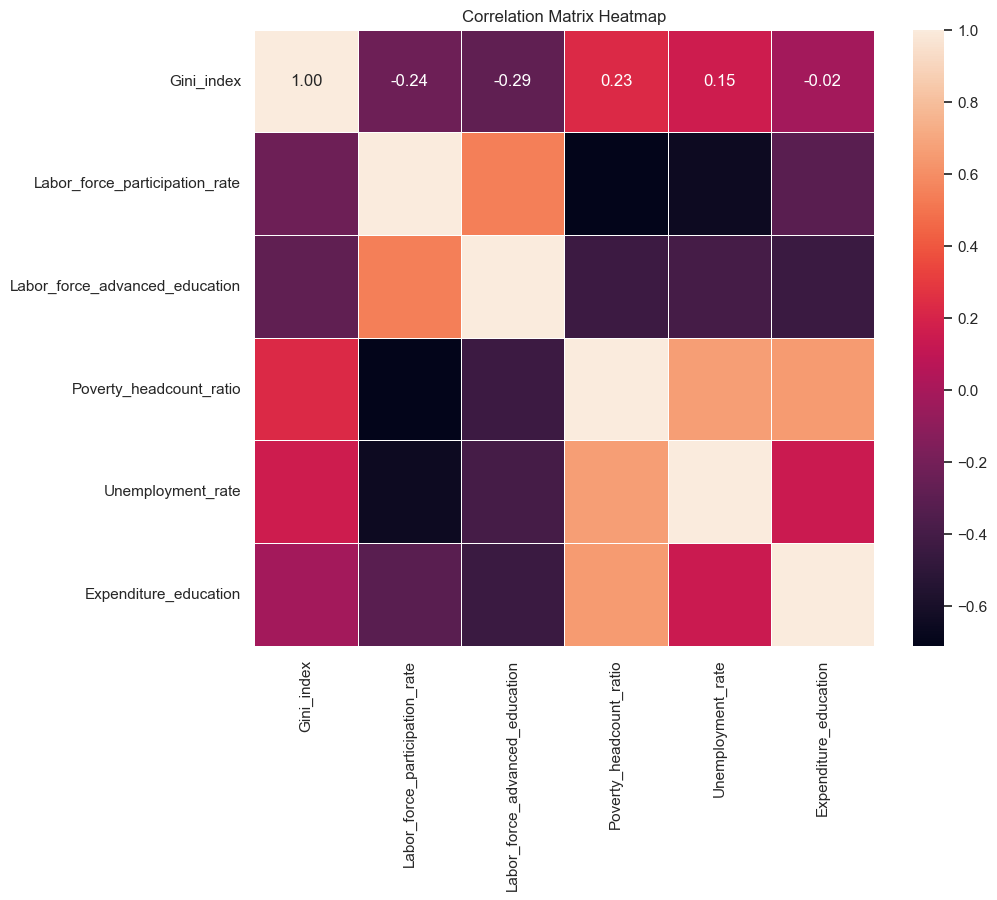

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!pip install ace_tools
# import ace_tools as tools


# Load the merged data for analysis
data_path = r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
data = pd.read_csv(data_path)

# Data cleaning (removing unnecessary columns, renaming columns for convenience)
data_cleaned = data.rename(columns={
    'Gini index': 'Gini_index',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Labor_force_participation_rate',
    'Labor force with advanced education (% of total working-age population with advanced education)': 'Labor_force_advanced_education',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)': 'Poverty_headcount_ratio',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment_rate',
    'Expenditure on education as % of total government expenditure (%)': 'Expenditure_education'
})

# Selecting relevant variables for analysis
variables = ['Gini_index', 'Labor_force_participation_rate', 'Labor_force_advanced_education', 
             'Poverty_headcount_ratio', 'Unemployment_rate', 'Expenditure_education']

# Creating a dataset with the selected variables
df = data_cleaned[variables].dropna()

# Step 1: Checking the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [76]:

# Now we can proceed to regression analysis based on this correlation matrix
Y = df['Gini_index']  # Dependent variable (income inequality)
X = df[['Labor_force_participation_rate', 'Labor_force_advanced_education', 
        'Poverty_headcount_ratio', 'Unemployment_rate', 'Expenditure_education']]

# Adding a constant for the regression model
X = sm.add_constant(X)

# Step 2: Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Step 3: Perform assumption checks and hypothesis testing
regression_summary = model.summary()

# Display the regression results for analysis
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini_index   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.200
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.345
Time:                        10:21:16   Log-Likelihood:                -35.480
No. Observations:                  26   AIC:                             82.96
Df Residuals:                      20   BIC:                             90.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            107.9406     40.103      2.692      0.014      24.288     191.594
Labor_force_participation_rate     0.0637      0.192      0.331      0.744      -0.337       0.465
Labor_force_advanced_education    -0.7952      0.481     -1.654      0.114      -1.798       0.208
Poverty_headcount_ratio            0.0833      0.050      1.673      0.110      -0.021       0.187
Unemployment_rate                 -0.9045      0.798     -1.133      0.270      -2.569       0.760
Expenditure_education             -0.3993      0.216     -1.852      0.079      -0.849       0.050
==============================================================================
Omnibus:                       15.982   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.721
Skew:                           1.597   Prob(JB):                     0.000234
Kurtosis:                       5.288   Cond. No.                     2.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   Year  Expenditure on education as % of total government expenditure (%)  \
0  2000                                           18.05421                   
1  2001                                           18.05421                   
2  2002                                           18.05421                   
3  2003                                           18.05421                   
4  2004                                           18.05421                   

   Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total  \
0                                                0.3                                                                                  
1                                                0.3                                                                                  
2                                                0.3                                                                          

C:\Users\HHGiang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HHGiang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HHGiang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest K-fold Cross-Validation Scores: [1.  0.6 1.  1.  1. ]
Average CV Accuracy: 0.9199999999999999


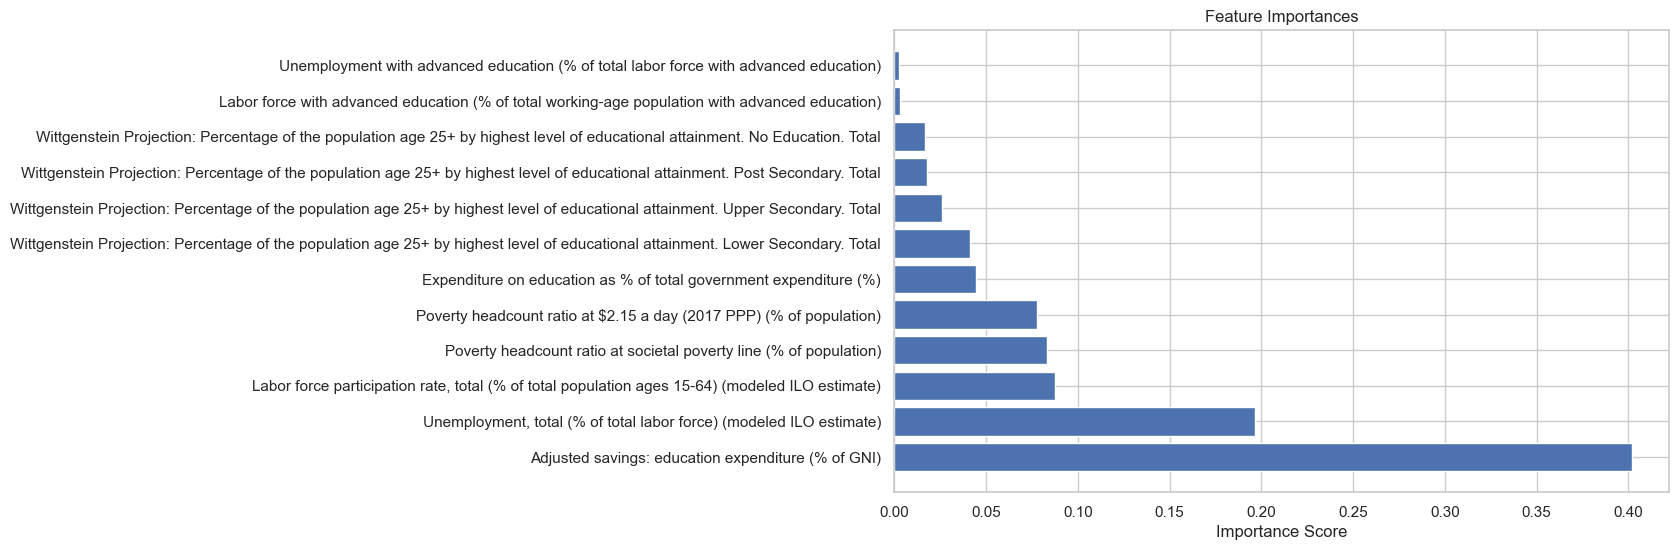

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
df = pd.read_csv(data_path)

# Quick data inspection
print(df.head())

# Preprocessing: Fill missing values, scale the features
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Drop the 'Year' column for the ML models (since it's a time feature)
X = df.drop(columns=['Year', 'Gini index'])  # Features
y = df['Gini index']  # Target for regression

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets for regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 1. Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation for regression
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')

# 2. Random Forest Classifier (for classification)
# Transform Gini index to categorical for classification (e.g., High and Low inequality)
y_classification = pd.cut(df['Gini index'], bins=2, labels=[0, 1])

# Split the data again for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_classification, test_size=0.3, random_state=42)

# Random Forest Classification Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Predictions and evaluation for classification
y_pred_clf = rf_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print(f'Random Forest Classification Accuracy: {accuracy}')
print(f'Classification Report: \n{classification_report(y_test_clf, y_pred_clf)}')

# 3. K-fold Cross Validation for classification (Optional)
kf = KFold(n_splits=5)
cv_scores = cross_val_score(rf_clf, X_scaled, y_classification, cv=kf)
print(f'Random Forest K-fold Cross-Validation Scores: {cv_scores}')
print(f'Average CV Accuracy: {cv_scores.mean()}')

# Visualize Feature Importances for the Random Forest
importances = rf_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importance Score")
plt.show()


Epoch 1/50


C:\Users\HHGiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 1280.5552 - mae: 35.7771 - val_loss: 1317.8705 - val_mae: 36.2610
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1268.9703 - mae: 35.6158 - val_loss: 1308.2616 - val_mae: 36.1276
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1249.4666 - mae: 35.3408 - val_loss: 1298.5481 - val_mae: 35.9921
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1238.3761 - mae: 35.1840 - val_loss: 1289.0728 - val_mae: 35.8592
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1229.2483 - mae: 35.0547 - val_loss: 1279.2736 - val_mae: 35.7213
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1217.3969 - mae: 34.8858 - val_loss: 1269.4613 - val_mae: 35.5826
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1210.4355 - mae: 34.7874 - val_loss: 1259.4471 - val_mae: 35.4403
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1196.2380 - mae: 34.5834 - val_loss: 1248.6771 - val_mae: 35.2865
Epoch 9/50
2/2 ━━━━━━━━━━━

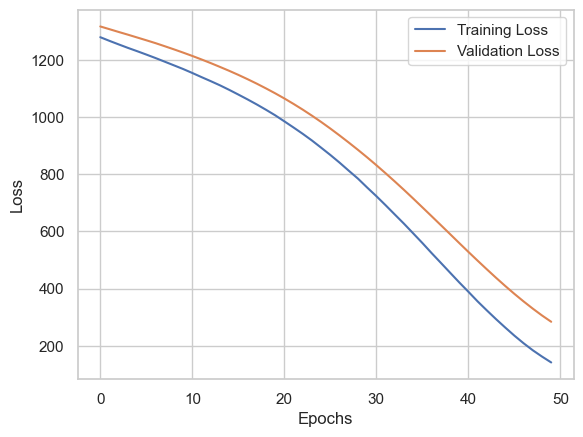

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your data
data_path = r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
df = pd.read_csv(data_path)

# Drop rows with missing values (if necessary)
df = df.dropna()

# Independent Variables (Features) and Dependent Variable (Gini Index)
X = df.drop(columns=['Year', 'Gini index'])  # Features
y = df['Gini index']  # Target for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression (single output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=8)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE (Mean Absolute Error): {test_mae}")

# Predict on test data
y_pred = model.predict(X_test_scaled)

# If you want to plot the history of training (loss curves)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50


C:\Users\HHGiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - loss: 155.3740 - mae: 7.7298 - val_loss: 157.8724 - val_mae: 7.3705
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 149.6995 - mae: 7.3268 - val_loss: 152.9211 - val_mae: 7.1245
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 141.0602 - mae: 6.9638 - val_loss: 147.4043 - val_mae: 6.8559
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 137.4618 - mae: 6.7712 - val_loss: 141.4963 - val_mae: 6.5720
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 140.5207 - mae: 7.0865 - val_loss: 135.5379 - val_mae: 6.3369
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 92.6268 - mae: 5.1782 - val_loss: 129.8060 - val_mae: 6.1054
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 124.7404 - mae: 6.5213 - val_loss: 123.7589 - val_mae: 5.8562
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 115.5340 - mae: 6.0950 - val_loss: 117.5552 - val_mae: 5.5992
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11

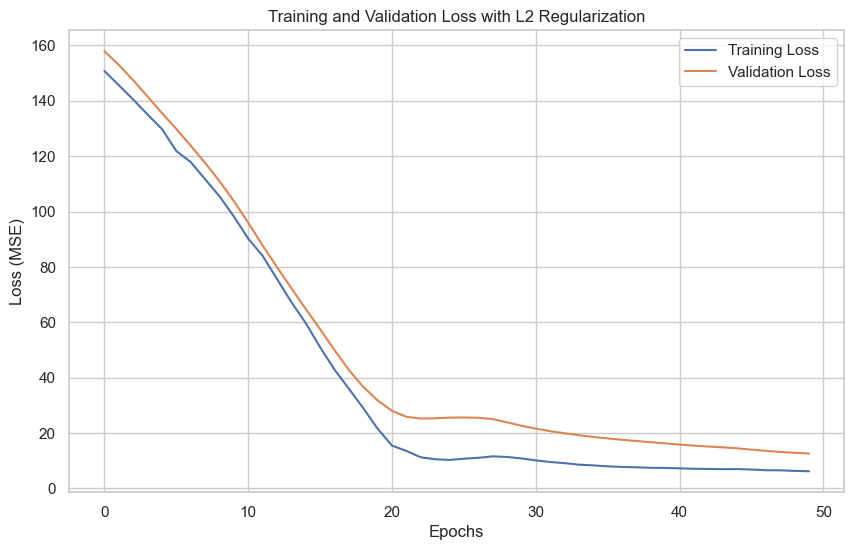

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.6260 - mae: 2.6285
Test Loss: 12.626011848449707
Test MAE: 2.6285412311553955


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Load the data
data_path = r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
df = pd.read_csv(data_path)

# Drop any irrelevant columns for the current task
# Exclude Gini Index and any other unnecessary columns
df = df.drop(columns=['Gini index', 'Year'])

# Define the target variable (Y) as 'Poverty headcount ratio'
Y = df['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].values

# Define the features (X) as all education, labor force, and unemployment data
X = df.drop(columns=['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']).values

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))  # Single output for regression (predicting poverty)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=16)

# Plotting the loss values during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
data = pd.read_csv(data_path)

# Drop irrelevant columns (e.g., Gini index and other unneeded columns)
data_cleaned = data.drop(columns=['Gini index', 'Year'])  # Drop Gini index and Year

# Define the dependent and independent variables
X = data_cleaned.drop(columns=['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'])
y = data_cleaned['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features (optional, depending on the model's sensitivity)


Random Forest MSE: 8.766863874999956


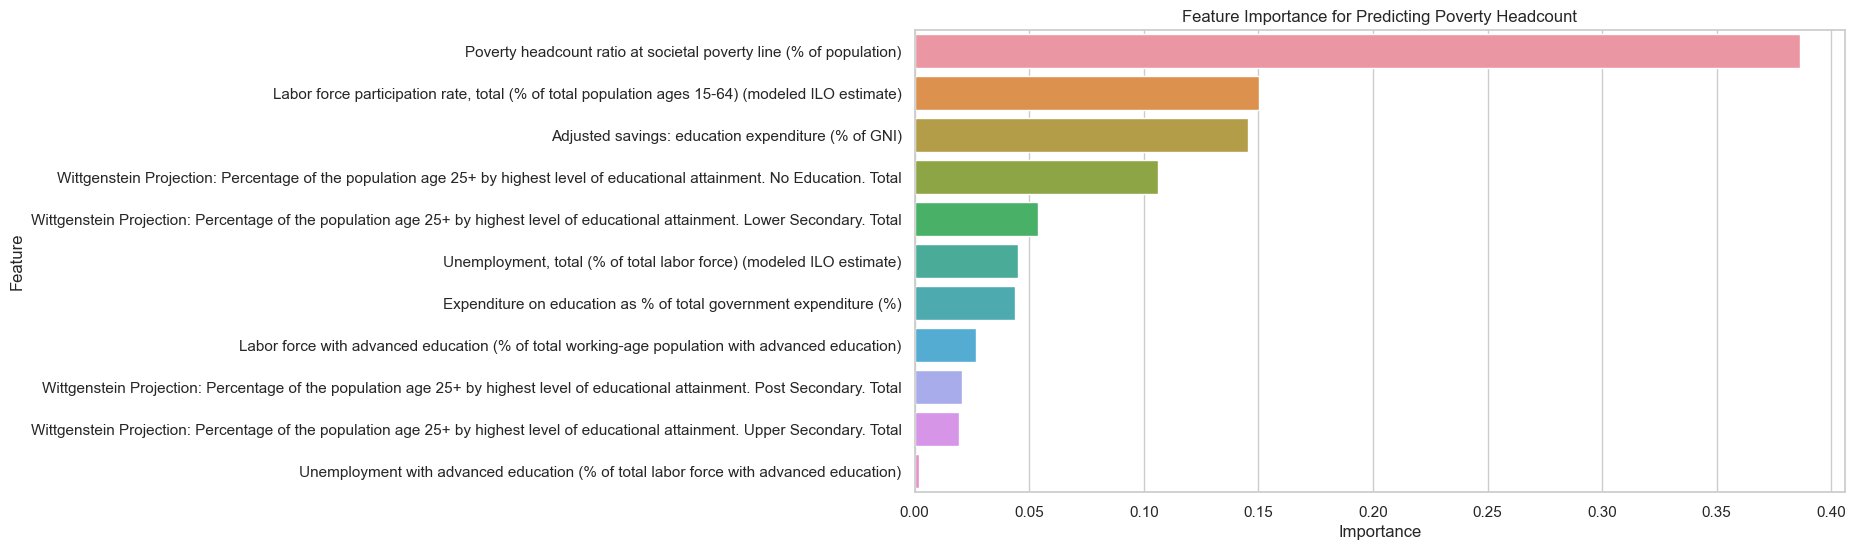

In [85]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate Mean Squared Error
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {mse}')

# Get feature importance
importance = rf_model.feature_importances_

# Plot feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Poverty Headcount')
plt.show()


Education Model MSE: 22.439860518081062


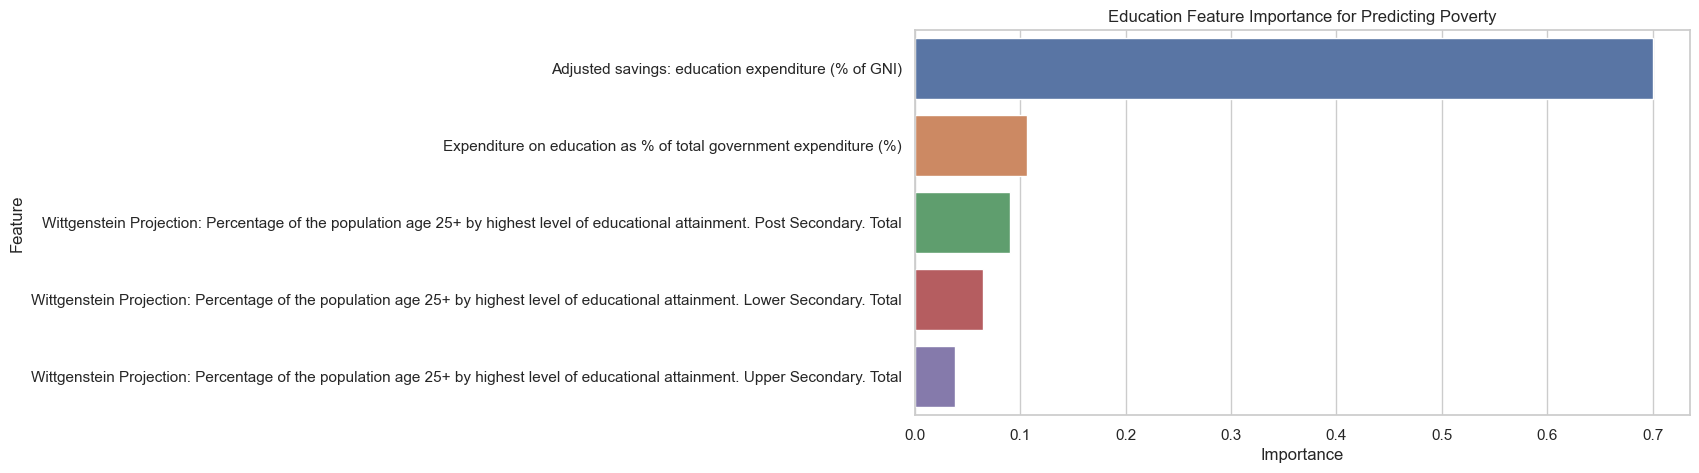

In [86]:
# Focus on education-related features
education_features = ['Expenditure on education as % of total government expenditure (%)',
                      'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total',
                      'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total',
                      'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total',
                      'Adjusted savings: education expenditure (% of GNI)']

# Train the model again using only education-related features
X_education = X[education_features]
X_train_ed, X_test_ed, y_train_ed, y_test_ed = train_test_split(X_education, y, test_size=0.3, random_state=42)

rf_model_education = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_education.fit(X_train_ed, y_train_ed)

# Predict and calculate MSE
y_pred_ed = rf_model_education.predict(X_test_ed)
mse_ed = mean_squared_error(y_test_ed, y_pred_ed)
print(f'Education Model MSE: {mse_ed}')

# Plot feature importance for education
importance_education = rf_model_education.feature_importances_
education_df = pd.DataFrame({'Feature': education_features, 'Importance': importance_education}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=education_df)
plt.title('Education Feature Importance for Predicting Poverty')
plt.show()


Epoch 1/50


C:\Users\HHGiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 811.6414 - mae: 27.0673 - val_loss: 675.6710 - val_mae: 25.3934
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 816.8253 - mae: 27.2027 - val_loss: 672.9634 - val_mae: 25.3440
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 806.9009 - mae: 27.0157 - val_loss: 670.5338 - val_mae: 25.2986
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 805.6056 - mae: 26.9990 - val_loss: 668.0609 - val_mae: 25.2523
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 806.3606 - mae: 26.9986 - val_loss: 665.5751 - val_mae: 25.2057
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 802.7535 - mae: 26.9248 - val_loss: 663.0832 - val_mae: 25.1587
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 798.9760 - mae: 26.8524 - val_loss: 660.5911 - val_mae: 25.1121
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 799.5653 - mae: 26.8749 - val_loss: 658.3940 - val_mae: 25.0698
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/s

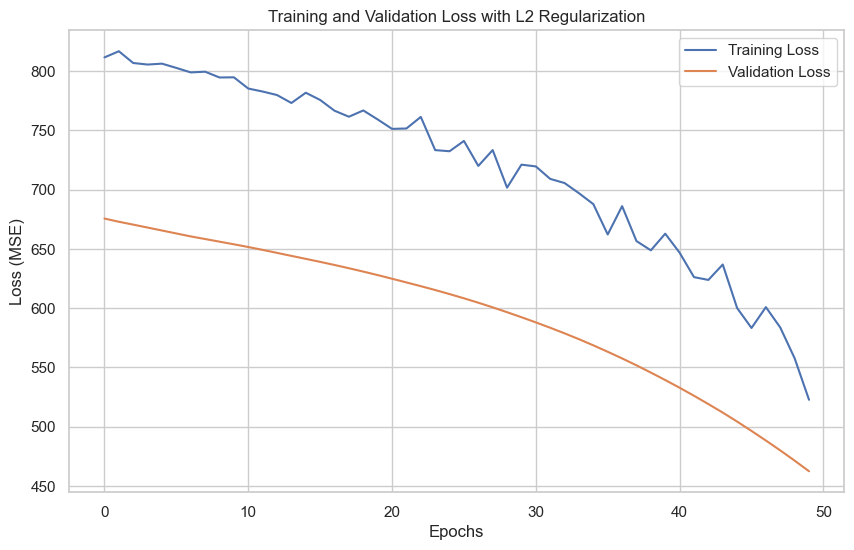

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_4, built=True> does not.

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv")

# Define X and Y (target is poverty, select education-related features and others)
X = data[['Adjusted savings: education expenditure (% of GNI)',
          'Expenditure on education as % of total government expenditure (%)',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total']]
Y = data['Poverty headcount ratio at societal poverty line (% of population)']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model with L2 regularization and dropout
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')  # Regression problem, so output is a linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Feature importance (optional step)
from sklearn.inspection import permutation_importance

# Fit model to calculate feature importance (based on trained weights)
results = permutation_importance(model, X_test_scaled, Y_test, n_repeats=10, random_state=42)

# Plot feature importances
sorted_idx = results.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], results.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance Score")
plt.title('Feature Importance for Predicting Poverty')
plt.show()


In [89]:
# r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv"
!pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   --------- ------------------------------ 112.6/456.1 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 225.3/456.1 kB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 399.4/456.1 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.0 MB/s eta 0:00:00


Epoch 1/50


C:\Users\HHGiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 843.1212 - mae: 27.6711 - val_loss: 690.9556 - val_mae: 25.6968
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 837.9154 - mae: 27.5709 - val_loss: 689.2029 - val_mae: 25.6661
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 835.6555 - mae: 27.5321 - val_loss: 687.6727 - val_mae: 25.6387
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 837.0297 - mae: 27.5549 - val_loss: 686.4150 - val_mae: 25.6152
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 838.3680 - mae: 27.5809 - val_loss: 685.2302 - val_mae: 25.5931
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 830.2453 - mae: 27.4361 - val_loss: 684.1534 - val_mae: 25.5738
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 831.1307 - mae: 27.4462 - val_loss: 683.1130 - val_mae: 25.5553
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 832.5214 - mae: 27.4996 - val_loss: 682.2551 - val_mae: 25.5398
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/s

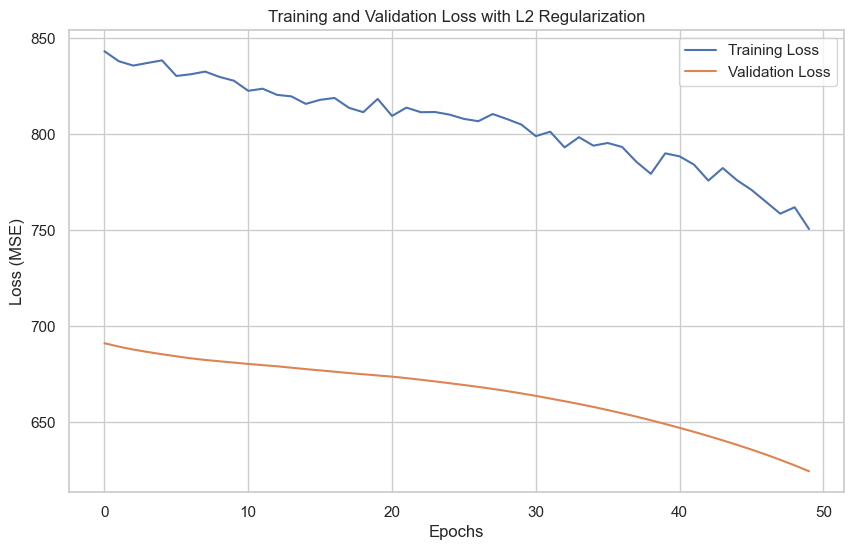

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


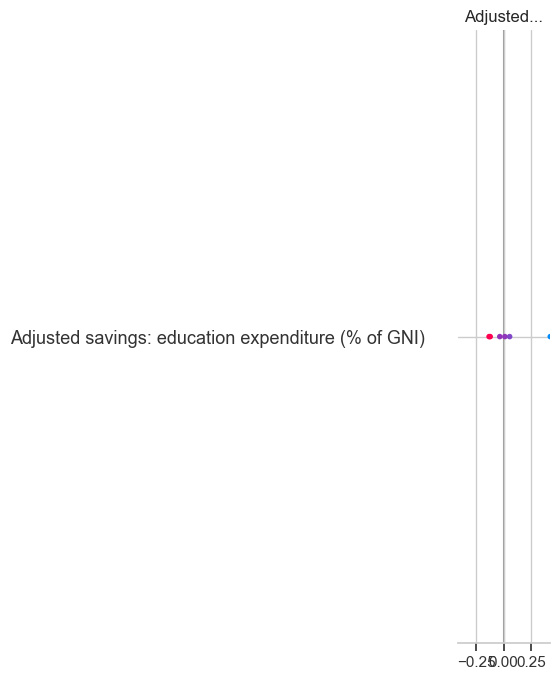

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import shap

# Load your data
data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv")

# Define X and Y (target is poverty, select education-related features and others)
X = data[['Adjusted savings: education expenditure (% of GNI)',
          'Expenditure on education as % of total government expenditure (%)',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Lower Secondary. Total',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total',
          'Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total']]
Y = data['Poverty headcount ratio at societal poverty line (% of population)']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model with L2 regularization and dropout
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# SHAP explanation for feature importance
explainer = shap.KernelExplainer(model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot the feature importance (SHAP summary plot)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


                                                    OLS Regression Results                                                    
Dep. Variable:     Poverty headcount ratio at societal poverty line (% of population)   R-squared:                       0.998
Model:                                                                            OLS   Adj. R-squared:                  0.997
Method:                                                                 Least Squares   F-statistic:                     691.3
Date:                                                                Fri, 18 Oct 2024   Prob (F-statistic):           3.64e-17
Time:                                                                        11:14:01   Log-Likelihood:                -9.3511
No. Observations:                                                                  26   AIC:                             42.70
Df Residuals:                                                                      14   BIC:                   

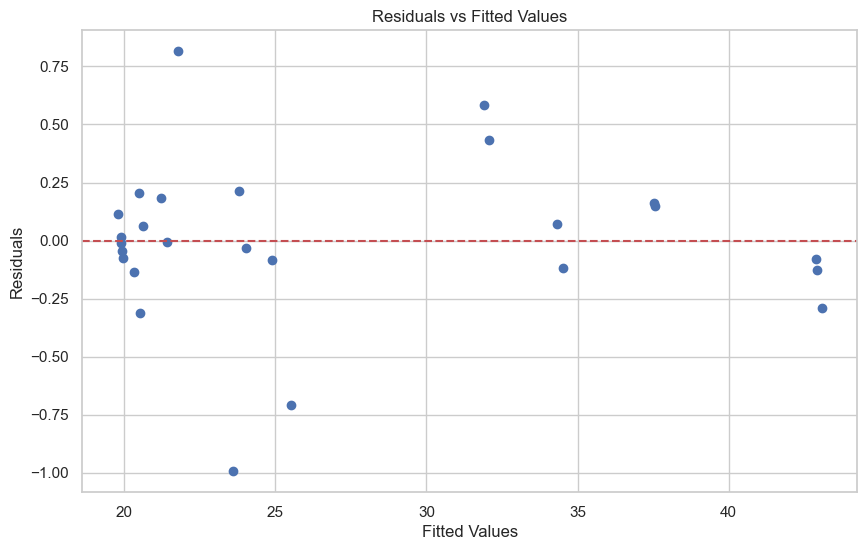

Durbin-Watson test statistic: 2.64
Breusch-Pagan test statistic: 11.10, p-value: 0.5200


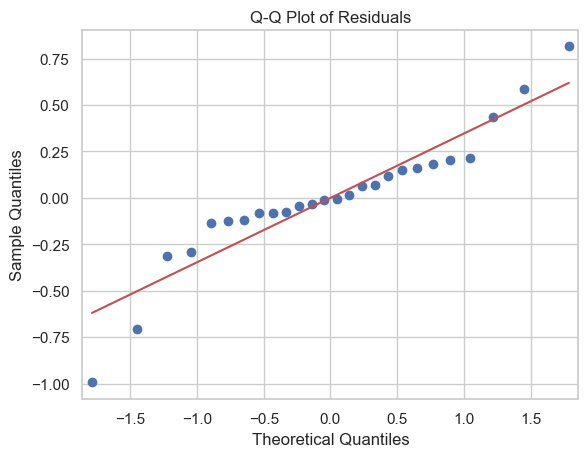

Shapiro-Wilk test statistic: 0.9171, p-value: 0.0384


In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# Load your dataset
data = pd.read_csv(r"C:\Users\HHGiang\Documents\KEIO\4FZ\merged_filled_WBdata.csv")

# Specify the target variable (Y) and features (X)
# Replace 'Poverty headcount ratio' with the actual column name of poverty variable in your dataset
Y = data['Poverty headcount ratio at societal poverty line (% of population)']  # Dependent variable

# Drop Gini Index and any irrelevant columns
X = data.drop(columns=['Gini index', 'Poverty headcount ratio at societal poverty line (% of population)'])

# Step 1: Add a constant (intercept) to the independent variables
X_const = sm.add_constant(X)

# Step 2: Fit the OLS Model
ols_model = sm.OLS(Y, X_const).fit()

# Step 3: View the Summary of the OLS Model
print(ols_model.summary())

# Step 4: Get the residuals
residuals = ols_model.resid

# Step 5: Plotting residuals to visually check for linearity and homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(ols_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# ===============================
# ASSUMPTION 1: LINEARITY
# ===============================
# Linearity implies that the relationship between independent variables and the dependent variable is linear.
# Scatter plot of residuals vs. fitted values checks for random distribution of residuals around zero (already plotted above).

# ===============================
# ASSUMPTION 2: INDEPENDENCE OF ERRORS
# ===============================
# Durbin-Watson test for autocorrelation in residuals
durbin_watson_value = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {durbin_watson_value:.2f}')

# ===============================
# ASSUMPTION 3: HOMOSCEDASTICITY
# ===============================
# Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(residuals, ols_model.model.exog)
print(f'Breusch-Pagan test statistic: {bp_test[0]:.2f}, p-value: {bp_test[1]:.4f}')
# A p-value > 0.05 suggests no evidence of heteroscedasticity.

# ===============================
# ASSUMPTION 4: NORMALITY OF RESIDUALS
# ===============================
# Q-Q plot for normality
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}')
# A p-value > 0.05 suggests that the residuals are normally distributed.

# ===============================
# ASSUMPTION 5: NO MULTICOLLINEARITY


In [94]:
# Convert OLS summary to a DataFrame
ols_summary_df = pd.DataFrame(ols_model.summary2().tables[1])

# Save summary to CSV file
ols_summary_df.to_csv("OLS_Summary_Table.csv")
